In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Create X matrix of regressor variables
X = df.drop(['DEATH_EVENT'], axis = 1)

In [5]:
# Create y vector of regressand variable DEATH_EVENT
y = df['DEATH_EVENT']

In [6]:
ratio_death = df[df["DEATH_EVENT"] == 1].DEATH_EVENT.sum() / df.DEATH_EVENT.count()
print(f"Verhältnis positiver vs negativer Ausprägungen in der Zielvariable: {ratio_death}")

Verhältnis positiver vs negativer Ausprägungen in der Zielvariable: 0.3210702341137124


### 1. Durchgang: Ursprüngliche Daten 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
model = RandomForestClassifier()

In [9]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_preds = model.predict(X_test)

In [11]:
confusion_matrix(y_test, y_preds)

array([[52,  5],
       [18, 24]], dtype=int64)

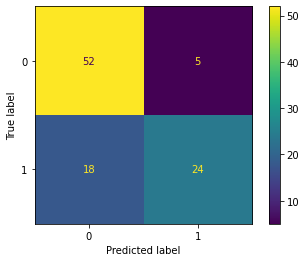

In [12]:
plot_confusion_matrix(model, X_test, y_test) 

### 2. Durchgang: SMOTE Upsampling Daten

In [97]:
#Experiment: SMOTE UPSAMLING

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

print(f"Neues Verhältnis nach SMOTE Anwendung:{y[y == 1].sum() / len(y)}")


Neues Verhältnis nach SMOTE Anwendung:0.3210702341137124


In [98]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.33, random_state=42)

In [99]:
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [100]:
y_preds = rf.predict(X_test)

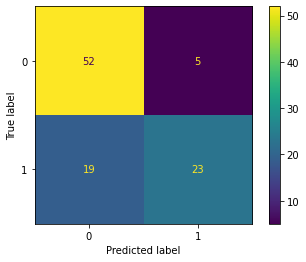

In [101]:
plot_confusion_matrix(model, X_test, y_test);

### 3. Durchgang: PCA Daten

### 4. Durchgang: Beste Datengrundlage und Hyperparameter Tuning

In [102]:
grid = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [103]:
rf = RandomForestClassifier()
rf_tune = GridSearchCV(rf, grid, cv=3)
rf_tune.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]})

In [104]:
print(rf_tune.best_params_)
print(rf_tune.best_estimator_)

{'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 10, 'n_estimators': 30}
RandomForestClassifier(max_depth=10, max_features=2, min_samples_leaf=10,
                       n_estimators=30)


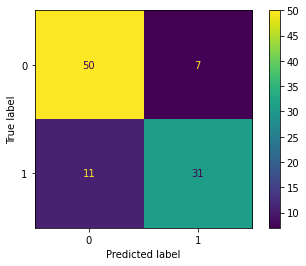

In [105]:
plot_confusion_matrix(rf_tune, X_test, y_test);

ToDo: ROC-AUC Kurve 

In [29]:
from sklearn.metrics import plot_roc_curve

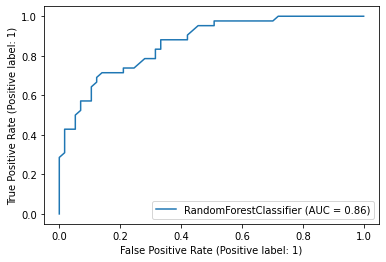

In [31]:
plot_roc_curve(model, X_test, y_test);

ToDo: Classification-Tree + Visualisierung dessen (https://www.kaggle.com/pratikmungekar/tree-random-forest-with-heart-failure-prediction) 

ToDo: Linear Discriminant Analysis (https://machinelearningmastery.com/linear-discriminant-analysis-with-python/#:~:text=The%20hyperparameters%20for%20the%20Linear%20Discriminant%20Analysis%20method,values%20for%20solvers%20that%20support%20the%20shrinkage%20capability, https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) 